In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as ipw
from ipywidgets import interact, Layout, IntSlider, IntText


xl = 'income.xlsx'
df = pd.read_excel(xl)


ink_intervall, ink_klasser, klass_storlek, klass_index, guzzar, grabbar  = ([] for i in range(6)) #initializear tomma listor för 6 variabler
åld_grupp, less_you, more_you, lägre_klass, procent, topp = 0,0,0,0,0,0

########################################################################
###########################  Data Frame  ###############################
########################################################################

tot_bef = df.iloc[3:88,8,].tolist()
alla_inkomster = df.iloc[173:2298,8,].tolist()
aguzzi = df.iloc[173:2298,6,].tolist()
agrabi = df.iloc[173:2298,4,].tolist()
åldrar = df.iloc[3:88,1,].tolist()


df1, gudf, grdf = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
df1.index = gudf.index = grdf.index = åldrar


#loopar och delar upp i inkomstklasser åldrar 16-100+, ersätter '..' med 0
for c in range(0,len(alla_inkomster),85):
    temp = [0 if alla_inkomster[c+cc] == '..' else alla_inkomster[c+cc] for cc in range(0,85)]
    ink_klasser.append(temp)

for c in range(0,len(aguzzi),85):
    temp = [0 if aguzzi[c+cc] == '..' else aguzzi[c+cc] for cc in range(0,85)]
    guzzar.append(temp)

for c in range(0,len(aguzzi),85):
    temp = [0 if agrabi[c+cc] == '..' else agrabi[c+cc] for cc in range(0,85)]
    grabbar.append(temp)


#loopar in data i kolumner & döper kolumner, lägger till sista kolumn & döper om manuellt & lägger till sista rad & döper om manuellt
for (i,ii) in zip(list(range(0,400,20)), list(range(20))): df1[f"""{i}-{i+19} tkr""" ] = ink_klasser[ii]
for (i,ii) in zip(list(range(400,600,100)), list(range(20,22))): df1[f"""{i}-{i+99} tkr""" ] = ink_klasser[ii]
for (i,ii) in zip(list(range(600,1000,200)), list(range(22,24))): df1[f"""{i}-{i+199} tkr""" ] = ink_klasser[ii]

df1['1000+ tkr'] = ink_klasser[-1]
df1.rename(columns = {'0-19 tkr':'1-19 tkr'}, inplace=True)
klass_storlek = [ sum(i) for i in ink_klasser]
df1.loc['Antal'] = klass_storlek


for (i,ii) in zip(list(range(0,400,20)), list(range(20))): gudf[f"""{i}-{i+19} tkr""" ] = guzzar[ii]
for (i,ii) in zip(list(range(400,600,100)), list(range(20,22))): gudf[f"""{i}-{i+99} tkr""" ] = guzzar[ii]
for (i,ii) in zip(list(range(600,1000,200)), list(range(22,24))): gudf[f"""{i}-{i+199} tkr""" ] = guzzar[ii]

gudf['1000+ tkr'] = guzzar[-1]
gudf.rename(columns = {'0-19 tkr':'1-19 tkr'}, inplace=True)
guzz_storlek = [ sum(i) for i in guzzar]
gudf.loc['Antal'] = guzz_storlek


for (i,ii) in zip(list(range(0,400,20)), list(range(20))): grdf[f"""{i}-{i+19} tkr""" ] = grabbar[ii]
for (i,ii) in zip(list(range(400,600,100)), list(range(20,22))): grdf[f"""{i}-{i+99} tkr""" ] = grabbar[ii]
for (i,ii) in zip(list(range(600,1000,200)), list(range(22,24))): grdf[f"""{i}-{i+199} tkr""" ] = grabbar[ii]

grdf['1000+ tkr'] = grabbar[-1]
grdf.rename(columns = {'0-19 tkr':'1-19 tkr'}, inplace=True)
grabb_storlek = [ sum(i) for i in grabbar]
grdf.loc['Antal'] = grabb_storlek



In [2]:
########################################################################
###########################  Input  ####################################
########################################################################


def löne_index(m_lön):
    
    
    global ink_intervall

    års_inkomst = m_lön*12

    
    #splitar index kolumnnamn med re.split(), filtrerar bort '' + omvandlar till int i ny lista
    for cols in df1:
        ink_range = list(filter(None, re.split("-| tkr|\+ tkr| [\s_+]| ", cols)))


        if len(ink_range) == 1: #testar om superrik
            ink_intervall = '1000+ tkr' #hitta inkomstintervall
            break

        elif int(ink_range[0]) <= års_inkomst < int(ink_range[1]): #letar upp intervall
            ink_intervall = f"""{ink_range[0]}-{ink_range[1]} tkr""" 
            break

            
    klass_index = df1.columns.get_loc(ink_intervall) #hitta intervall index
    return klass_index


def curiosa(m_lön, ålder):

    
    global less_you, more_you, procent, topp, åld_grupp, lägre_klass
    t1,t2,t3 = 0,0,0
     
        
    klass_index = löne_index(m_lön)
    åld_grupp = df1.iat[ålder-16, klass_index]

    
    for a in range(0, klass_index): t1 += klass_storlek[a] #summera storleken
    for b in range(0,klass_index): t2 += df1.iat[ålder-16,b] #summerar alla i åldern som tjänar mindre
    for c in range(klass_index+1, 25): t3 += df1.iat[ålder-16,c] #summerar alla i åldern som tjänar mindre

    
    lägre_klass, less_you, more_you = t1,t2,t3    
    procent = lägre_klass/sum(tot_bef)*100
    topp = 100-procent



In [3]:
def textruta():

    
    p1 = (f"""
    Inkomstklass: {ink_intervall}/år.
    
    Topp {topp:.1f}% av inkomsttagare.
    """ )

    return p1


In [50]:

########################################################################
###########################  Output  ###################################
########################################################################



def visualisering(Ålder,klass_index):

    p = textruta()
        
    #väljer den högsta av inkomsterklasser, färglägger kolumner
    topp_klass = max(df1.iloc[Ålder-16,:].tolist()) #högst värdet på listan
    riket = df1.iloc[85,:]         #graf för hela riket
    stolpar = df1.iloc[Ålder-16,:] #ålder, x=inkomstklass koordinater
    colors = [f"b" for i in range(25)]
    colors[klass_index] = 'g'

    
    plt.text(5,topp_klass*0.75, p, fontsize=12,
            bbox = dict(facecolor = 'white', alpha=0.5))

    bakgrund = stolpar.T.plot.bar(color = colors,figsize=(15,5)); #23,7
    bakgrund.set_facecolor('black')
    
    plt.ylabel('Antal personer i inkomstklass')
    
    
    ##Subplots
    fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(15.25,6))   #   25,10 
    
    riket.T.plot.barh(ax=ax1, color = colors);#,figsize=(24,7));
    ax1.set_xticklabels(['0','0.2 Mil.','0.4 Mil.','0.6 Mil.','0.8 Mil.','1 Mil.'])

    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.set_title('\nInkomsttagare per inkomstklass för hela riket\n')
    for i,v in enumerate(riket):ax1.text(v, i, f'''{v:,}''', color='black', fontweight='bold', fontsize=9, ha='left', va='center')
    
    
    ax2.pie([åld_grupp,less_you,more_you], explode = [0.1,0,0],            #pie chart
            autopct = '%1.1f%%', startangle = 130, radius=1, shadow = True, colors = ['g','orangered','royalblue'])    
    plt.legend(title = f'''Födda {2022-Ålder}''',
               labels=[f'''{åld_grupp:,} tjänar lika mycket''', f'''{less_you:,} tjänar mindre''', f'''{more_you:,} tjänar mer'''], loc='lower right')
    
    
    plt.show()


In [51]:
def parametrar(Ålder,Månadslön):

    if 16 <= Ålder <= 100 and 1 <= Månadslön <= 100:

        curiosa(Månadslön, Ålder)
        index = löne_index(Månadslön)
        visualisering(Ålder, index)

    else:
        print(f"""
        Åldrar måste vara 16-100 och månadslön 1-100
        """)


interact(parametrar, Månadslön = IntText(35, description = 'Månadslön (tkr):', style = {'description_width': 'initial'}, layout=Layout(width='155px')),
               Ålder = IntText(34, description = 'Ålder:', layout=Layout(width='140px')));


interactive(children=(IntText(value=34, description='Ålder:', layout=Layout(width='140px')), IntText(value=35,…

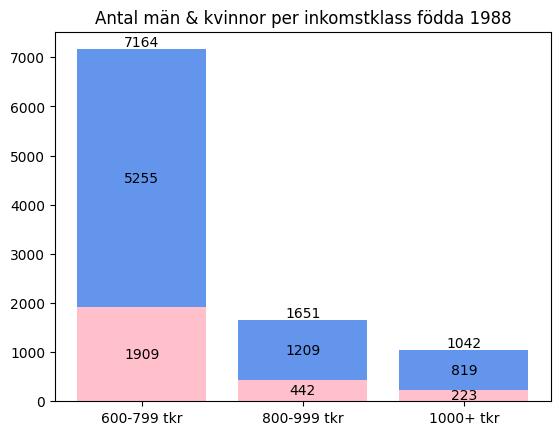

In [54]:

age = 34
pay = 24

fig, ax = plt.subplots()
ind = np.arange(3)   #3 kolumner
koln = grdf.columns

if 16 <= age <= 100 and 1 <= pay <= 22:    

    men = grdf.iloc[age-16,pay-1:pay+2].tolist()
    women = gudf.iloc[age-16,pay-1:pay+2].tolist()
    ax.set_title(f'''Antal män & kvinnor per inkomstklass födda {2022-age}''')
    ax.set_xticks(ind, labels=[koln[pay-1], koln[pay], koln[pay+1]])

else:

    men = grdf.iloc[age-16,22:25].tolist()
    women = gudf.iloc[age-16,22:25].tolist()
    ax.set_title(f'''Antal män & kvinnor per inkomstklass födda {2022-age}''')
    ax.set_xticks(ind, labels=[koln[22], koln[23], koln[24]])

p1 = ax.bar(ind, men, bottom=women, color='cornflowerblue')
p2 = ax.bar(ind, women, color='pink') #0.35 är bredd
ax.bar_label(p2, label_type='center')
ax.bar_label(p1, label_type='center')
ax.bar_label(p1)

plt.show()



In [4]:

########################################################################
#############################  Execute  ################################
########################################################################


def stapel(Ålder, Månadslön):
    
    curiosa(Månadslön, Ålder)
    index = löne_index(Månadslön)
    visualisering(Ålder, index)


interact(stapel, Månadslön = IntSlider(36,1,100,1,layout=Layout(width='500px')),
               Ålder = IntSlider(34,16,100,1,layout=Layout(width='500px')));


interactive(children=(IntSlider(value=34, description='Ålder', layout=Layout(width='500px'), min=16), IntSlide…

In [ ]:
#import ipywidgets as ipw
#from ipywidgets import interact, Layout, IntSlider



#@interact( Månadslön = (1,100), Ålder = (16,100))
#def graf(Ålder, Månadslön):
 #   pass


#interact(graf, Månadslön=IntSlider(50,10,100,1,layout=Layout(width='500px')), Ålder=IntSlider(0,25,100,1,layout=Layout(width='500px')));


def stapel(Ålder, Månadslön):
    
    curiosa(Månadslön, Ålder)
    index = löne_index(Månadslön)
    visualisering(Ålder, index)




interact(stapel, Månadslön = IntSlider(36,1,100,1,layout=Layout(width='500px')),
               Ålder = IntSlider(34,16,100,1,layout=Layout(width='500px')));


interactive(children=(IntSlider(value=34, description='Ålder', layout=Layout(width='500px'), min=16), IntSlide…

In [ ]:
åldrar = df.iloc[3:88,1,].tolist()
aguzzi = df.iloc[173:2298,6,].tolist()
agrabi = df.iloc[173:2298,4,].tolist()


guzzar, grabbar = [], []


for c in range(0,len(aguzzi),85):
    temp = [0 if aguzzi[c+cc] == '..' else aguzzi[c+cc] for cc in range(0,85)]
    guzzar.append(temp)

for c in range(0,len(aguzzi),85):
    temp = [0 if agrabi[c+cc] == '..' else agrabi[c+cc] for cc in range(0,85)]
    grabbar.append(temp)


gzdf = grdf = pd.DataFrame()
#grdf = pd.DataFrame()
gzdf.index = grdf.index = åldrar
#grdf.index = åldrar

    
for (i,ii) in zip(list(range(0,400,20)), list(range(20))): gzdf[f"""{i}-{i+19} tkr""" ] = guzzar[ii]
for (i,ii) in zip(list(range(400,600,100)), list(range(20,22))): gzdf[f"""{i}-{i+99} tkr""" ] = guzzar[ii]
for (i,ii) in zip(list(range(600,1000,200)), list(range(22,24))): gzdf[f"""{i}-{i+199} tkr""" ] = guzzar[ii]

for (i,ii) in zip(list(range(0,400,20)), list(range(20))): grdf[f"""{i}-{i+19} tkr""" ] = grabbar[ii]
for (i,ii) in zip(list(range(400,600,100)), list(range(20,22))): grdf[f"""{i}-{i+99} tkr""" ] = grabbar[ii]
for (i,ii) in zip(list(range(600,1000,200)), list(range(22,24))): grdf[f"""{i}-{i+199} tkr""" ] = grabbar[ii]



#lägger till sista kolumn & döper om manuellt
gzdf['1000+ tkr'] = guzzar[-1]
gzdf.rename(columns = {'0-19 tkr':'1-19 tkr'}, inplace=True)

grdf['1000+ tkr'] = grabbar[-1]
grdf.rename(columns = {'0-19 tkr':'1-19 tkr'}, inplace=True)


guzz_storlek = [ sum(i) for i in guzzar]
gzdf.loc['Antal'] = guzz_storlek

grabb_storlek = [ sum(i) for i in grabbar]
grdf.loc['Antal'] = grabb_storlek


grdf

